## Data Set Information:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation.

A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification.

For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera.  

Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

## Attribute Information:

Bean Id (B): The counter of the rows

Area (A): The area of a bean zone and the number of pixels within its boundaries.

Perimeter (P): Bean circumference is defined as the length of its border.

Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

Aspect ratio (K): Defines the relationship between L and l.

Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

Roundness (R): Calculated with the following formula: (4piA)/(P^2)

Compactness (CO): Measures the roundness of an object: Ed/L

ShapeFactor1 (SF1)

ShapeFactor2 (SF2)

ShapeFactor3 (SF3)

ShapeFactor4 (SF4)

Class: (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## IMPORT MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING THE DATASET

In [2]:
df=pd.read_excel('Dry_Bean_Dataset.xlsx')
df = df.rename(columns={'roundness':'Roundness'}).drop("Bean ID",axis=1)
#so every column name will start with capital letters and drop the Bean ID,because no information of Bean ID is related.

In [3]:
df.head()
#so we can observe the matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [5]:
#to display descriptive statistics
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
#to show basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

All the features of our dataset are int or float except for Class,which is an object.

In [7]:
#to display number of samples on each class
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

# PREPROCESSING THE DATASET

In [8]:
#check for null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

No missing values.

# EXPLORATORY DATA ANALYSIS

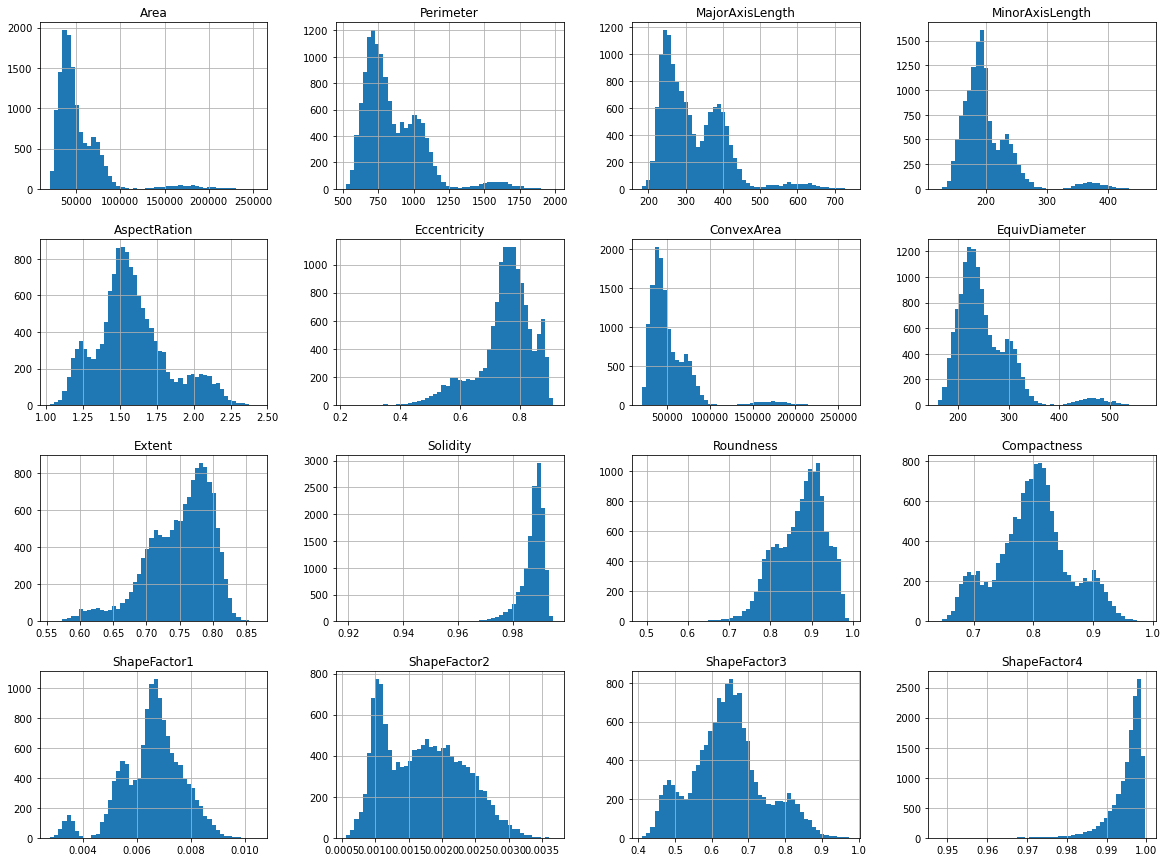

In [9]:
#histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

As we can see the Compactness histogram resembles the standard deviation, ShapeFactor3 and AspectRation histogram.

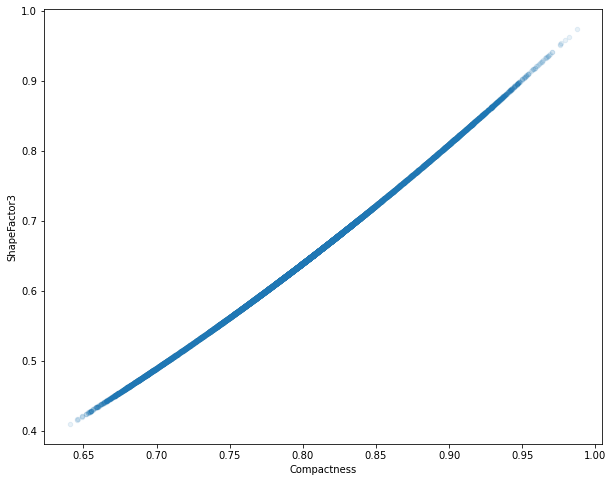

In [10]:
#scatterplot, 
df.plot(kind="scatter", x="Compactness", y="ShapeFactor3",figsize=(10,8),alpha=0.1);

ShapeFactor 3 is analogous to Compactness,
there are no outliers on this scatterplot which shows the strong correlation between ShapeFactor3 and Compactness.

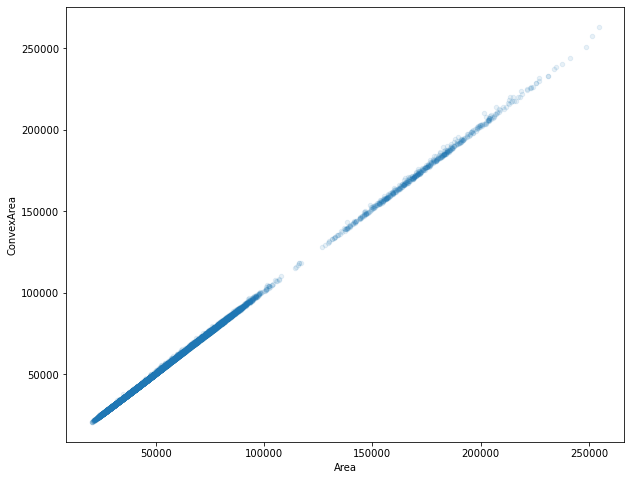

In [11]:
df.plot(kind="scatter", x="Area", y="ConvexArea",figsize=(10,8),alpha=0.1);

There are a few outliers on this graph,
again meaning there is a strong correlation between ConvexArea and Area and they both share more values < 100000.

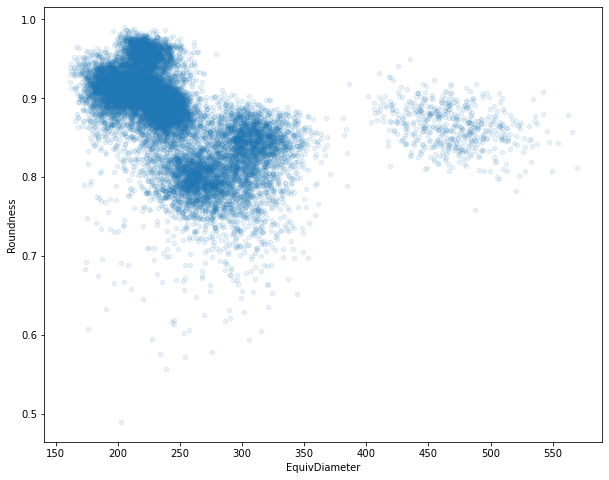

In [12]:
df.plot(kind="scatter", x="EquivDiameter", y="Roundness",figsize=(10,8),alpha=0.1);


The region Where Roundness is >0.8 and EquivDiameter is <350 is the most densly populated area in the graph.

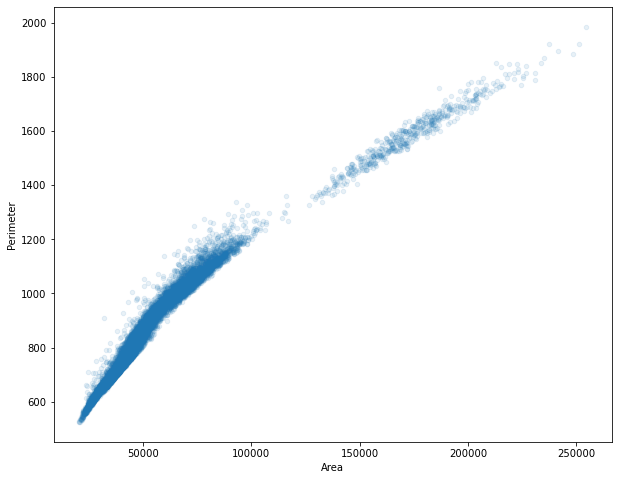

In [13]:
df.plot(kind="scatter", x="Area", y="Perimeter",figsize=(10,8),alpha=0.1);

More points lie in the region where area < 100000 and perimeter is <1200, there is a strong correlation between these values. 
Out with this region in the graph there is still a strong correlation between values however it is not as densly populated.  There are no major outlier on the graph.

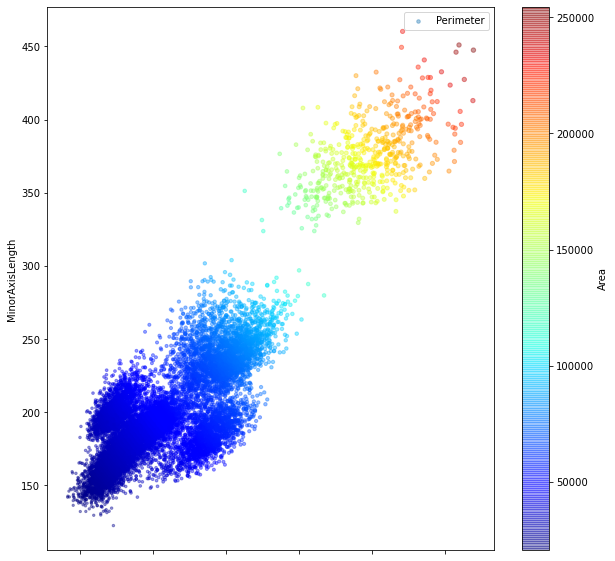

In [14]:
df.plot(kind="scatter", x="MajorAxisLength", y="MinorAxisLength", alpha=0.4,
    s=df["Perimeter"]/100, label="Perimeter", figsize=(10,10),
    c="Area", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend();

As the area is smaller the graph is more populated.
There is still a clear correlation between MinorAxisLength and MajorAxisLength however it is not as strong as previous graphs.
The correlation becomes less clear where there is a higher value for area, although it is still slighlty visible.

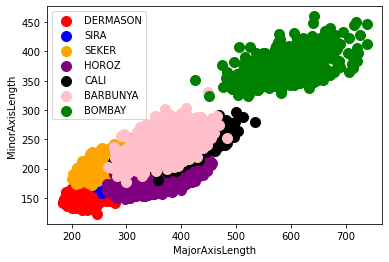

In [15]:
colors = ['red','blue','orange','purple','black','pink','green']
species= ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
for i in range(7):
    x=df[df['Class'] == species[i]]
    plt.scatter(x['MajorAxisLength'],x['MinorAxisLength'], c=colors[i],label=species[i],s=100)
plt.xlabel("MajorAxisLength")
plt.ylabel("MinorAxisLength")
plt.legend();

As we can see the barbunya is quite similar to cali, and the sira is quite similar to dermanson,seker and horoz.
Bombay on the other hand is clusted far away from the other species.

The following is a correlation matrix where we are looking for the highest values to show strongest correlation

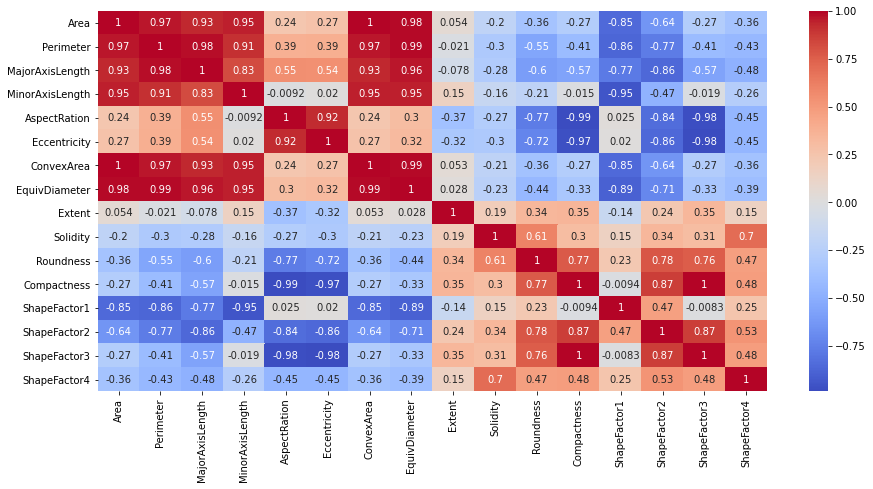

In [16]:
corr = df.corr()
fig, ax=plt.subplots(figsize=(15,7))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm');

The largest correlation is between Compactess and ShapeFactor3, and Area and ConvexArea where both are equal to 1.
The second highest correlation is between equivdiameter and perimeter and is equal to 99.
The third highest correlations are two the MajorAxislength with the Perimeter,and the Area with the Equivdiameter are equal to 98.

# LABEL ENCODER

In [17]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,5
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


All Species converted to numbers.

In [18]:
df['Class'].value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

In [19]:
corr = df.corr()
corr["Class"].sort_values(ascending=False)

Class              1.000000
ShapeFactor1       0.391907
Roundness          0.384972
ShapeFactor2       0.335122
Solidity           0.321283
ShapeFactor3       0.167673
ShapeFactor4       0.165033
Compactness        0.156204
Extent            -0.031184
AspectRation      -0.116332
Eccentricity      -0.200356
MajorAxisLength   -0.455175
MinorAxisLength   -0.458492
Area              -0.475252
ConvexArea        -0.477459
EquivDiameter     -0.481099
Perimeter         -0.507638
Name: Class, dtype: float64

The above are used in the following new datasets.

In [20]:
dataset1=df[["ShapeFactor1","Roundness"]]
dataset2=df[["ShapeFactor1","Roundness","ShapeFactor2","Solidity","ShapeFactor3"]]
dataset3=df[["ShapeFactor1","Roundness","ShapeFactor2","Solidity","ShapeFactor3","ShapeFactor4","Compactness","Extent","AspectRation","Eccentricity"]]

I divided my data into 3 different data sets based on how related is to the species.
Ιn the beginning I got the first 2 attributes, then the first 5 and then the first 10.

#  MODEL TRAINING

In [21]:
#for my original data

In [22]:
from sklearn.model_selection import train_test_split
# train-70% of the data
# test -30% of the data
X = df.drop(columns=['Class'])
Y = df['Class']
x_train, x_test, y_train,y_test=train_test_split(X,Y,random_state=42,test_size=.30)

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(y_pred)

[5 0 5 ... 4 5 4]


We see some of the predictions.

In [24]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=(np.array(confusion_matrix(y_test,y_pred)))
cm

array([[188,   0, 158,   0,  39,   0,  10],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 90,   0, 367,   0,  19,   0,   3],
       [  0,   0,   0, 868,   0, 121,  54],
       [ 20,   0,  27,  14, 465,   0,  62],
       [  5,   0,   0, 103,   5, 435,  71],
       [  0,   0,   0,  36,  64,  68, 631]], dtype=int64)

From the matrix we perceive that the values of diagonal are the correct predicts
and the rest values of the matrix are the incorrects.

We can also see that in the first row  the correct vaules are almost the same with the incorrects.
We can also see that in the second row there are only correct values.

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54       395
           1       1.00      1.00      1.00       161
           2       0.66      0.77      0.71       479
           3       0.85      0.83      0.84      1043
           4       0.79      0.79      0.79       588
           5       0.70      0.70      0.70       619
           6       0.76      0.79      0.77       799

    accuracy                           0.76      4084
   macro avg       0.77      0.77      0.76      4084
weighted avg       0.76      0.76      0.76      4084



The Accuracy is equal to 77% and we can also see the precision,recall, f1-score and of BOMBAY(1) is equal to 1,which is the best score,because there are no incorrect values.

In the first row the percentages are low,because of the many incorrect values.

In [26]:
TP = np.diag(cm)
TP

array([188, 161, 367, 868, 465, 435, 631], dtype=int64)

True Positive values

In [27]:
FP = cm.sum(axis=0) - np.diag(cm)
FP

array([115,   0, 185, 153, 127, 189, 200], dtype=int64)

False Positive values

#### For my first dataset(dataset1)

In [28]:
A=dataset1
Y = df['Class']
a_train, a_test, y1_train, y1_test=train_test_split(A,Y,random_state=42,test_size=.30)

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(a_train,y1_train)
y_pred1=gnb.predict(a_test)
print(y_pred1)

[5 0 5 ... 4 5 4]


In [30]:
from sklearn.metrics import confusion_matrix ,classification_report
cm1=np.array(confusion_matrix(y1_test,y_pred1))
cm1

array([[220,   0, 155,   0,  16,   1,   3],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 31,   0, 429,   0,   9,   4,   6],
       [  0,   0,   0, 899,  12,  30, 102],
       [  9,   0,   5,  10, 553,   0,  11],
       [  2,   0,   8,   9,   3, 549,  48],
       [  0,   0,   1,  56,  22,  54, 666]], dtype=int64)

From the matrix we perceive that the values of diagonal are the correct predicts
and the rest values of the matrix are the incorrects.
Also can be noticed that in the first row there are still many incorrect values.

In [31]:
print(classification_report(y1_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67       395
           1       1.00      1.00      1.00       161
           2       0.72      0.90      0.80       479
           3       0.92      0.86      0.89      1043
           4       0.90      0.94      0.92       588
           5       0.86      0.89      0.87       619
           6       0.80      0.83      0.81       799

    accuracy                           0.85      4084
   macro avg       0.86      0.85      0.85      4084
weighted avg       0.86      0.85      0.85      4084



The accuracy  is higher than my normal data(85%),because only positive correlations were used.In my normal data I have
9 negative correlations and 7 positive.Here I have only 2 positives.
We can also see the precision,recall, f1-score and of BOMBAY(1) is equal to 1,which is the best score,because there are no incorrect values.

In [32]:
FP = cm1.sum(axis=0) - np.diag(cm1)
FP

array([ 42,   0, 169,  75,  62,  89, 170], dtype=int64)

False Positive values

In [33]:
TP = np.diag(cm1)
TP

array([220, 161, 429, 899, 553, 549, 666], dtype=int64)

True Positive values

### For my second dataset2

In [34]:
B=dataset2
Y = df['Class']
b_train, b_test, y2_train, y2_test=train_test_split(B,Y,random_state=42,test_size=.30)

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(b_train,y2_train)
y_pred2=gnb.predict(b_test)
print(y_pred2)


[5 0 5 ... 4 5 0]


In [36]:
from sklearn.metrics import confusion_matrix ,classification_report
cm2=np.array(confusion_matrix(y2_test,y_pred2))
cm2

array([[332,   0,  50,   0,   3,   2,   8],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 20,   0, 439,   0,  11,   1,   8],
       [  2,   0,   0, 921,   0,  23,  97],
       [  2,   0,   7,   5, 566,   0,   8],
       [  5,   0,   0,  22,   0, 577,  15],
       [  7,   0,   3,  56,  15,   8, 710]], dtype=int64)

From the matrix we perceive that the values of diagonal are the correct predicts
and the rest values of the matrix are the incorrects.
Also can be noticed that in the first row the incorrects values have been discreased and
in the second row we have only one incorrect value.

In [37]:
print(classification_report(y2_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       395
           1       1.00      1.00      1.00       161
           2       0.88      0.92      0.90       479
           3       0.92      0.88      0.90      1043
           4       0.95      0.96      0.96       588
           5       0.94      0.93      0.94       619
           6       0.84      0.89      0.86       799

    accuracy                           0.91      4084
   macro avg       0.92      0.92      0.92      4084
weighted avg       0.91      0.91      0.91      4084



The accuracy is the highest in my second dataset,because more positive attirbutes were used and no negatives.

We can also see the precision, f1-score and of BOMBAY(1) is equal to 1,which is the best score,because there is only one incorrect value and recall is equal to 99%.

In [38]:
FP = cm2.sum(axis=0) - np.diag(cm2)
FP

array([ 36,   0,  60,  83,  29,  34, 136], dtype=int64)

False Positive values

In [39]:
TP = np.diag(cm2)
TP

array([332, 161, 439, 921, 566, 577, 710], dtype=int64)

True Positive values

### For my third dataset3

In [40]:
C=dataset3
Y = df['Class']
c_train, c_test, y3_train, y3_test=train_test_split(C,Y,random_state=42,test_size=.30)

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(c_train,y3_train)
y_pred3=gnb.predict(c_test)
print(y_pred3)

[5 0 5 ... 4 5 0]


In [42]:
from sklearn.metrics import confusion_matrix ,classification_report
cm3=np.array(confusion_matrix(y3_test,y_pred3))
cm3

array([[315,   0,  56,   0,   5,  10,   9],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 34,   0, 422,   1,  15,   1,   6],
       [  3,   0,   0, 910,   4,  26, 100],
       [  0,   0,  19,   1, 557,   0,  11],
       [  3,   0,   0,  31,   0, 577,   8],
       [  5,   0,  16, 105,  10,   3, 660]], dtype=int64)

From the matrix we perceive that the values of diagonal are the correct predicts
and the rest values of the matrix are the incorrects.
The most incorrect values are in the last row.

In [43]:
print(classification_report(y3_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83       395
           1       1.00      1.00      1.00       161
           2       0.82      0.88      0.85       479
           3       0.87      0.87      0.87      1043
           4       0.94      0.95      0.94       588
           5       0.94      0.93      0.93       619
           6       0.83      0.83      0.83       799

    accuracy                           0.88      4084
   macro avg       0.90      0.89      0.89      4084
weighted avg       0.88      0.88      0.88      4084



The accuracy is 88%,which is higher than my normal data,because less negative attributes were used.
It is also lower than my second dataset,because my second dataset has only positive attributes and no negatives.

The last row has the lowest percentage,because it has also the most incorrect values.

In [44]:
FP = cm3.sum(axis=0) - np.diag(cm3)
FP

array([ 45,   0,  91, 138,  34,  40, 134], dtype=int64)

False Positive values

In [45]:
TP = np.diag(cm3)
TP

array([315, 161, 422, 910, 557, 577, 660], dtype=int64)

True Positive values

## Conclusion

So the best model is in dataset2,because it has the highest accuracy and has not negative correlated attributes with the Class.
The second is in dataset3,because it has  7 positive and 3 negative correlated attributes with the Class.
The third is in dataset1,which has only 2 positive correlated attibutes with the Class.
The last one is in normal dataset,which has 7 positive and 9 negative correlated attributes with the Class.

# Clustering

Before applying the k-means lets check the clusttering tedency of the data with Hopkins statistic.Higher the value higher the clustering tedency of the dataset

In [46]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import adjusted_rand_score

In [47]:
def hopkins(X):
    d=X.shape[1]
    n=len(X)
    m=int(0.1* n)
    nbrs=NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X=sample(range(0,n,1),m)
    ujd=[]
    wjd=[]
    for j in range(0,m):
        u_dist, _  = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1),2,return_distance=True)
        wjd.append(w_dist[0][1])
    H= sum(ujd) / (sum(ujd)+sum(wjd))
    if isnan(H):
        print(ujd,wjd)
        H=0
    return H

In [48]:
hopkins(X)

0.9988828781368874

value is more than 80% so we can step forward to k-means algorithm

## scalling the dataset

Clustering on the non-normalised data fails. 
Clustering on the normalised data works very well.

In [49]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
xs.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


#kmeans

In [50]:
kmeans = KMeans(n_clusters=7,random_state=42)
y_kmeans = kmeans.fit_predict(xs)
print(y_kmeans)
kmeans.cluster_centers_

[4 4 4 ... 5 5 5]


array([[ 0.41496046,  0.6930205 ,  0.76691715,  0.32543516,  0.81917029,
         0.78684493,  0.44378861,  0.56268014, -0.40103674, -2.96551365,
        -1.16735917, -0.91303717, -0.43498892, -0.94758464, -0.90592876,
        -3.12825638],
       [-0.73345798, -0.92010578, -0.89724752, -0.83109697, -0.42698108,
        -0.19759058, -0.73412543, -0.89822949,  0.1298094 ,  0.25462573,
         0.63405245,  0.36339487,  1.0880087 ,  0.81128711,  0.33412751,
         0.4531675 ],
       [ 0.71533621,  0.95791125,  0.8646517 ,  0.84077963,  0.25487856,
         0.40120697,  0.71785473,  0.90127879,  0.15070139, -0.44608435,
        -0.80551332, -0.33645472, -1.06563002, -0.82200753, -0.35780512,
        -0.30318101],
       [ 4.11346767,  3.41217353,  3.19034289,  3.83060726,  0.01059567,
         0.21451488,  4.10507812,  3.65259098,  0.54796952, -0.04289891,
        -0.14760912, -0.11842367, -2.76907508, -1.46417965, -0.14649743,
        -0.7303608 ],
       [-0.46569066, -0.62256664, -0

we can observe the cluster centers

In [51]:
kmeans.labels_

array([4, 4, 4, ..., 5, 5, 5])

In [52]:
#assignt the label
X_grouped = xs.copy()
X_grouped['cluster_id'] = kmeans.labels_
X_grouped.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,cluster_id
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,4
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,4
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,4
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,4
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,4


In [53]:
#checking how many points are assigned to each cluster_ids
X_grouped['cluster_id'].value_counts()

1    3157
5    3111
2    2481
4    2032
6    1770
0     540
3     520
Name: cluster_id, dtype: int64

<AxesSubplot:xlabel='cluster_id', ylabel='Roundness'>

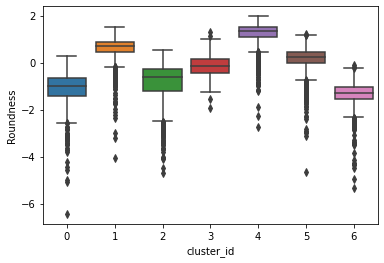

In [54]:
#box plot for cluster id versus Roundness
sns.boxplot(x='cluster_id', y='Roundness',data=X_grouped)

<AxesSubplot:xlabel='ShapeFactor1', ylabel='Roundness'>

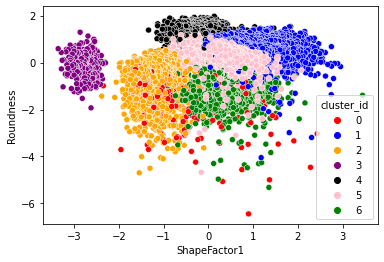

In [55]:
#scatter plot for ShapeFactor1 versus Roundness
sns.scatterplot(x='ShapeFactor1', y='Roundness',hue ='cluster_id',data=X_grouped,palette=['red','blue','orange','purple','black','pink','green'])

In [56]:
#gaussian

Text(0, 0.5, 'Feature 1')

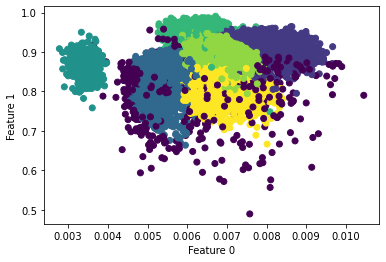

In [57]:
gmm = GaussianMixture(n_components=7,random_state=42).fit(xs)
labels = gmm.predict(xs)
plt.scatter(B.iloc[:,0],B.iloc[:,1],c=labels)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [58]:
#assign cluster labels and check how many data points are assigned to each cluster_ids
X_grouped['cluster_labels_gmm'] = labels
X_grouped['cluster_labels_gmm'].value_counts()

5    3191
1    2836
2    2514
4    1984
6    1873
0     693
3     520
Name: cluster_labels_gmm, dtype: int64

## Predicting the Data

In [59]:
#Kmeans prediction
y_pred_kmeans = kmeans.predict(xs)

#GMM prediction
y_pred_gmm = gmm.predict(xs)

print("ARI of KMeans =",adjusted_rand_score(Y,y_pred_kmeans))

print("ARI of GMM =",adjusted_rand_score(Y,y_pred_gmm))

ARI of KMeans = 0.6687265810561633
ARI of GMM = 0.6815195552239716


Rand index adjusted for chance. The Rand Index computes a similarity measure between two clusterings by considering 
all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

In [60]:
# Evaluate the score
hscore = homogeneity_score(X_grouped['cluster_id'],Y)
  
print(hscore)

hscore1 = homogeneity_score(X_grouped['cluster_labels_gmm'],Y)
  
print(hscore1)


0.7230042569201878
0.7382144569029347


We can see that the scores of gmm and kmeans are quite similar.

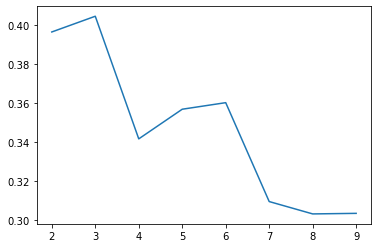

In [61]:
sse_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(xs)
    sse_.append([k, silhouette_score(xs,kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1]);

the sihouette score reaches a peak at around 4 clusters,starting from 3 clusters,indicating that it might be the ideal number of clusters.

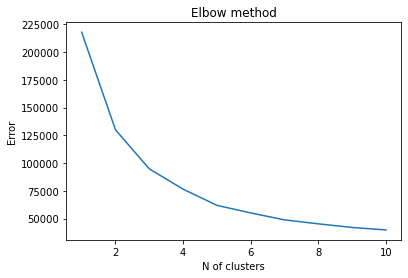

In [62]:
Error=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i).fit(xs)
    kmeans.fit(xs)
    Error.append(kmeans.inertia_)
plt.plot(range(1,11),Error)
plt.title('Elbow method')
plt.xlabel('N of clusters')
plt.ylabel('Error')
plt.show()

from the elbow method we see that the ideal number of clusters is 5

try different number of clusters

In [63]:
kmeans = KMeans(n_clusters=5,random_state=42)
y_kmeans = kmeans.fit_predict(xs)
print(y_kmeans)
kmeans.cluster_centers_

[2 2 2 ... 3 3 3]


array([[ 1.25404598e-02,  2.86636223e-01,  5.86438435e-01,
        -3.97882159e-01,  1.73719087e+00,  1.24266626e+00,
         1.43938863e-02,  1.19542340e-01, -9.36274160e-01,
        -3.44861746e-01, -1.29450912e+00, -1.56013285e+00,
         3.84338788e-01, -1.09543259e+00, -1.49443437e+00,
        -6.61167609e-01],
       [ 6.74680952e-01,  9.14625764e-01,  8.36558219e-01,
         7.86937444e-01,  2.79061207e-01,  4.21935083e-01,
         6.80284881e-01,  8.56463453e-01,  1.15000341e-01,
        -7.11730555e-01, -8.00927227e-01, -3.67393509e-01,
        -1.00686015e+00, -8.15688669e-01, -3.88004549e-01,
        -5.70140984e-01],
       [-4.91028919e-01, -6.55274746e-01, -8.56054037e-01,
        -7.76478560e-02, -1.37770929e+00, -1.79593667e+00,
        -4.94993327e-01, -5.38290311e-01,  4.67232143e-01,
         6.58933259e-01,  1.22025876e+00,  1.57449959e+00,
        -9.27582109e-02,  1.45502985e+00,  1.63330008e+00,
         7.32082204e-01],
       [-5.27071561e-01, -6.21502744e

In [64]:
kmeans.labels_

array([2, 2, 2, ..., 3, 3, 3])

In [65]:
#assignt the label
X_grouped = xs.copy()
X_grouped['cluster_id5'] = kmeans.labels_
X_grouped.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,cluster_id5
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,2
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,2
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,2
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,2
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,2


In [66]:
X_grouped['cluster_id5'].value_counts()

3    5856
1    2962
2    2199
0    2073
4     521
Name: cluster_id5, dtype: int64

<AxesSubplot:xlabel='cluster_id5', ylabel='Roundness'>

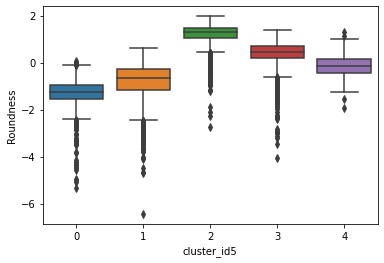

In [67]:
#box plot for cluster id versus Roundness
sns.boxplot(x='cluster_id5', y='Roundness',data=X_grouped)

<AxesSubplot:xlabel='ShapeFactor1', ylabel='Roundness'>

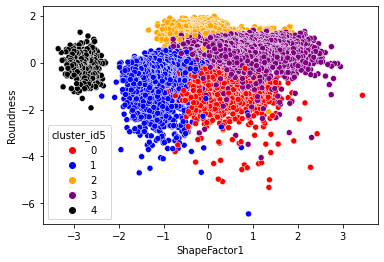

In [68]:
#scatter plot for ShapeFactor1 versus Roundness
sns.scatterplot(x='ShapeFactor1', y='Roundness',hue ='cluster_id5',data=X_grouped,palette=['red','blue','orange','purple','black'])

Text(0, 0.5, 'Feature 1')

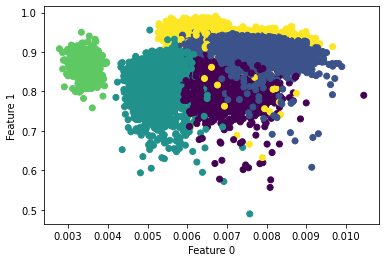

In [69]:
gmm = GaussianMixture(n_components=5,random_state=42).fit(xs)
labels = gmm.predict(xs)
plt.scatter(B.iloc[:,0],B.iloc[:,1],c=labels)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [70]:
#assign cluster labels and check how many data points are assigned to each cluster_ids
X_grouped['cluster_labels_gmm5'] = labels
X_grouped['cluster_labels_gmm5'].value_counts()

1    5092
2    2925
4    2788
0    2283
3     523
Name: cluster_labels_gmm5, dtype: int64

In [71]:
#Kmeans prediction
y_pred_kmeans = kmeans.predict(xs)

#GMM prediction
y_pred_gmm = gmm.predict(xs)


print("ARI of KMeans =",adjusted_rand_score(Y,y_pred_kmeans))


print("ARI of GMM =",adjusted_rand_score(Y,y_pred_gmm))

ARI of KMeans = 0.5575935695939039
ARI of GMM = 0.5192482069307313


 a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

In [72]:
# Evaluate the score
hscore = homogeneity_score(X_grouped['cluster_id5'],Y)
  
print(hscore)

hscore1 = homogeneity_score(X_grouped['cluster_labels_gmm5'],Y)
  
print(hscore1)

0.8008154603366818
0.7586101988058208


kmeans accuracy is better than gmm's because we compare 7 classes to 5 clusters.If the number of the classes and the number of the clusters would be the same,then gmm would have higher accuracy than kmeans.

## Conclusion

The methodology of classification and clustering is different, and the outcome expected from their algorithms differs as well.As classification deals with a greater number of stages, the complexity of the classification algorithms is higher than the clustering algorithms whose aim is only to group the data.Because of that the accuracy of classification is higher than the accuracy of clustering.

# Decision Trees

In [73]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

obtain the train test split

In [74]:
from sklearn.model_selection import train_test_split
# train-90% of the data
# test -10% of the data
X = df.drop(columns=['Class'])
y = df['Class']
x_train, x_test, y_train,y_test=train_test_split(X,y,test_size=.10,random_state=42)

## Decision Tree Classifier cross_val

In [75]:
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,min_samples_split=2)
tree_clf.fit(X,y)
y_predd=tree_clf.predict(X)
print(y_predd)

[3 3 3 ... 6 6 6]


In [76]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
predicted=cross_val_predict(tree_clf,X,y,cv=10)
metrics.accuracy_score(y,predicted)

0.6685034163544192

In [77]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=np.array(confusion_matrix(y,predicted))
cm

array([[   0,    0, 1190,    0,   15,   20,   97],
       [   0,    0,  522,    0,    0,    0,    0],
       [   0,    0, 1561,    0,   58,    2,    9],
       [   0,    0,    0, 2477,    1,   39, 1029],
       [   0,    0,  154,   55, 1553,    0,  166],
       [   0,    0,    7,  103,    1, 1450,  466],
       [   0,    0,   42,  385,  132,   19, 2058]], dtype=int64)

we can see that the first 2 columns are 0 and the values of diagonal are the true positive values

In [78]:
print(classification_report(y,predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1322
           1       0.00      0.00      0.00       522
           2       0.45      0.96      0.61      1630
           3       0.82      0.70      0.75      3546
           4       0.88      0.81      0.84      1928
           5       0.95      0.72      0.82      2027
           6       0.54      0.78      0.64      2636

    accuracy                           0.67     13611
   macro avg       0.52      0.57      0.52     13611
weighted avg       0.64      0.67      0.63     13611



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we can see that the accuracy is 67,but we can increase it,because if we notice first and second rows are 0

In [79]:
FP = cm.sum(axis=0) - np.diag(cm)
FP

array([   0,    0, 1915,  543,  207,   80, 1767], dtype=int64)

False Positive

In [80]:
TP = np.diag(cm)
TP

array([   0,    0, 1561, 2477, 1553, 1450, 2058], dtype=int64)

True Positive

## RandomForest cross_val

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=3,min_samples_leaf=1,min_samples_split=2)
clf.fit(X,y)
predictedr=cross_val_predict(clf,X,y,cv=10)
metrics.accuracy_score(y,predictedr)


0.7056792300345309

In [82]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=np.array(confusion_matrix(y,predictedr))
cm

array([[  22,    0, 1165,    0,    4,    7,  124],
       [   2,   92,  428,    0,    0,    0,    0],
       [   0,    0, 1571,    0,   33,    2,   24],
       [   0,    0,    0, 2608,    1,   68,  869],
       [   0,    0,   88,   56, 1676,    0,  108],
       [   4,    0,   13,  122,    0, 1741,  147],
       [   0,    0,   58,  564,  107,   12, 1895]], dtype=int64)

the diagonal shows the true positive values and we notice that the second column is null

In [83]:
print(classification_report(y,predictedr))

              precision    recall  f1-score   support

           0       0.79      0.02      0.03      1322
           1       1.00      0.18      0.30       522
           2       0.47      0.96      0.63      1630
           3       0.78      0.74      0.76      3546
           4       0.92      0.87      0.89      1928
           5       0.95      0.86      0.90      2027
           6       0.60      0.72      0.65      2636

    accuracy                           0.71     13611
   macro avg       0.79      0.62      0.60     13611
weighted avg       0.76      0.71      0.68     13611



the accuracy is 70%,which is  0.3% higher than DecisionTreeClassifier

## TREE PLOT

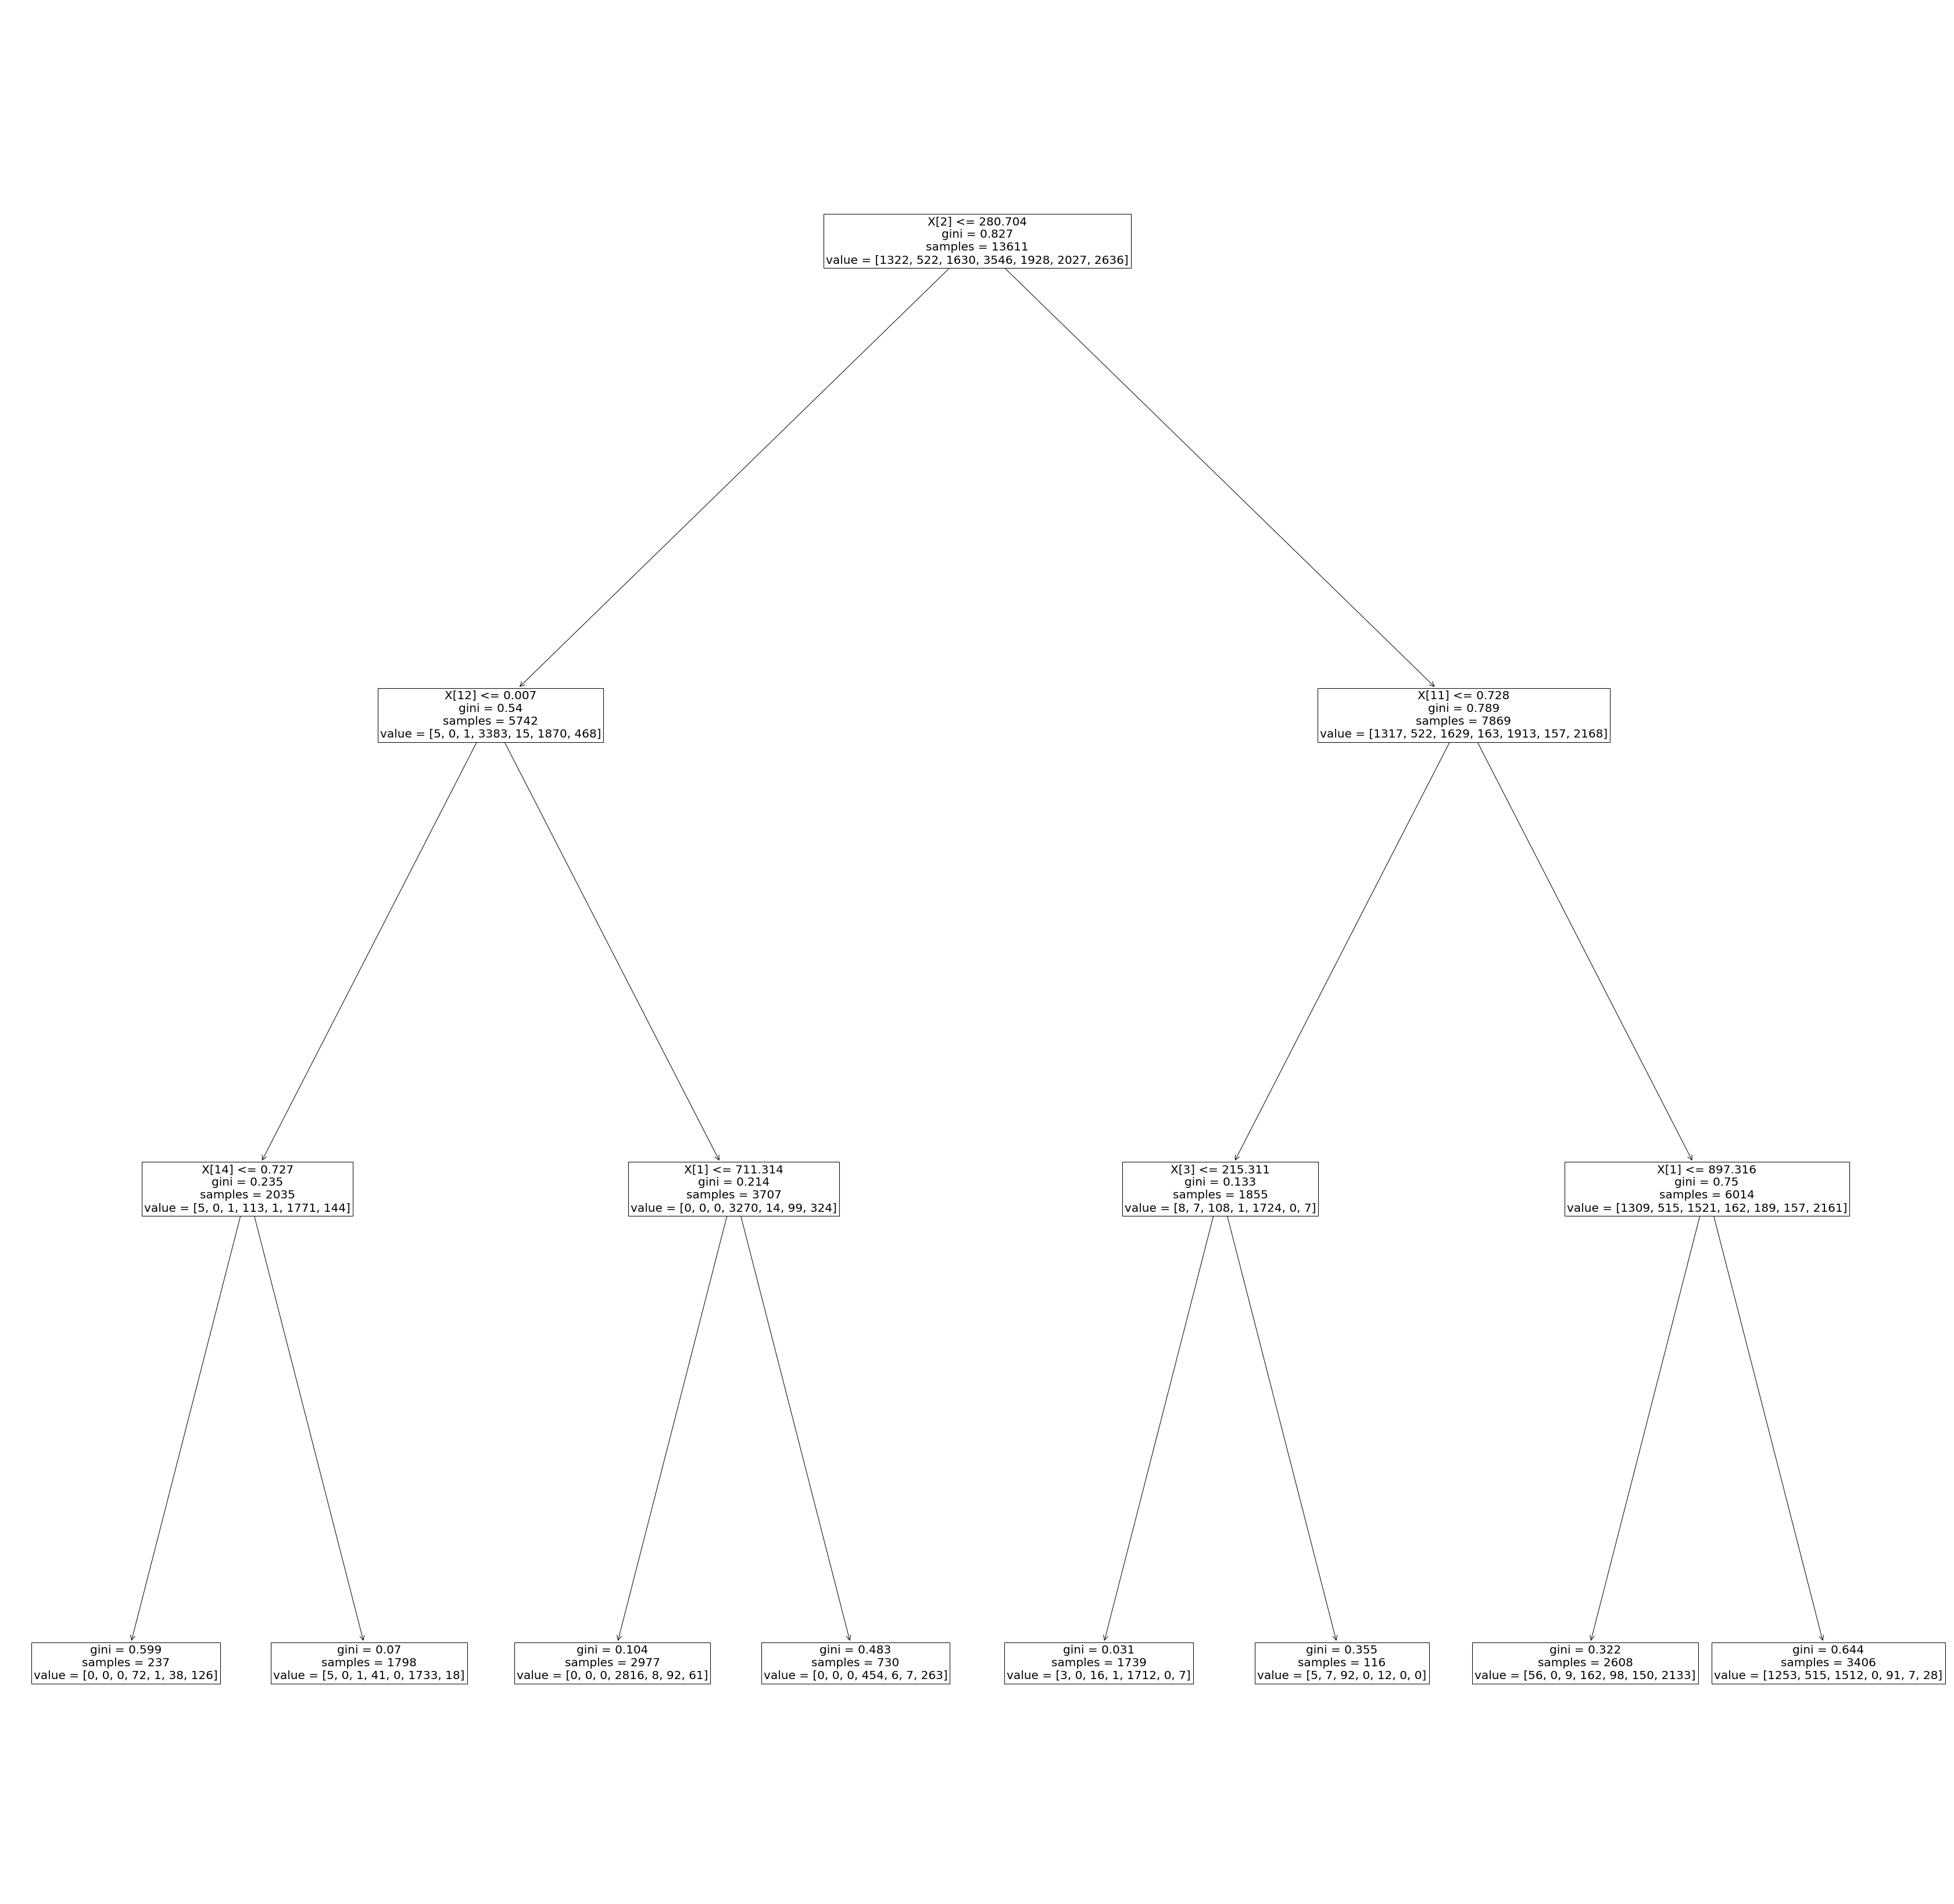

In [84]:
plt.figure(figsize=(60,60))  # set plot size (denoted in inches)
plot_tree(tree_clf, fontsize=20)
plt.show()

## Decisiontree for test train split

In [85]:
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,min_samples_split=2)
tree_clf.fit(x_train,y_train)
y_predd=tree_clf.predict(x_test)
print(y_predd)

[5 2 5 ... 5 4 3]


In [86]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=np.array(confusion_matrix(y_test,y_predd))
cm

array([[  0,   0, 123,   0,   0,   0,  10],
       [  0,   0,  57,   0,   0,   0,   0],
       [  0,   0, 168,   0,   1,   0,   1],
       [  0,   0,   0, 299,   0,   3,  28],
       [  0,   0,   9,   1, 176,   0,   8],
       [  0,   0,   0,  16,   0, 170,  15],
       [  0,   0,   1,  32,   0,   2, 242]], dtype=int64)

again the first two columns are null

In [87]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00        57
           2       0.47      0.99      0.64       170
           3       0.86      0.91      0.88       330
           4       0.99      0.91      0.95       194
           5       0.97      0.85      0.90       201
           6       0.80      0.87      0.83       277

    accuracy                           0.77      1362
   macro avg       0.58      0.65      0.60      1362
weighted avg       0.71      0.77      0.73      1362



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we can see that the accuracy in train test split is higher than crossvalidation's.

## RandomForest for train test split

In [88]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=3,min_samples_leaf=1,min_samples_split=2)
clf.fit(x_train,y_train)
y_predr=clf.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=np.array(confusion_matrix(y_test,y_predr))
cm

array([[  6,   0, 115,   0,   0,   0,  12],
       [  0,   0,  57,   0,   0,   0,   0],
       [  0,   0, 167,   0,   1,   0,   2],
       [  0,   0,   0, 303,   0,   1,  26],
       [  0,   0,   7,   3, 174,   0,  10],
       [  0,   0,   2,   4,   0, 173,  22],
       [  0,   0,   0,  28,   1,   2, 246]], dtype=int64)

the diagonal shows the true positive values and again the second column is null

In [90]:
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09       133
           1       0.00      0.00      0.00        57
           2       0.48      0.98      0.64       170
           3       0.90      0.92      0.91       330
           4       0.99      0.90      0.94       194
           5       0.98      0.86      0.92       201
           6       0.77      0.89      0.83       277

    accuracy                           0.78      1362
   macro avg       0.73      0.66      0.62      1362
weighted avg       0.82      0.78      0.75      1362



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the accuracy is 79%,which is again higher than decision tree's accuracy

# OPTIMASTION FOR DECISION TREE

## Changing the max_depth

In [91]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=10)
    tree_clf.fit(x_train, y_train)
    train_accuracy.append(tree_clf.score(x_train, y_train))
    validation_accuracy.append(tree_clf.score(x_test, y_test))
    

In [92]:
frame=pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.408523,0.401615
1,2,0.656543,0.649046
2,3,0.777451,0.774596
3,4,0.827414,0.834068
4,5,0.889950,0.880323


Create a new matrix so we can run a legend and understand which is the max_depth

No handles with labels found to put in legend.


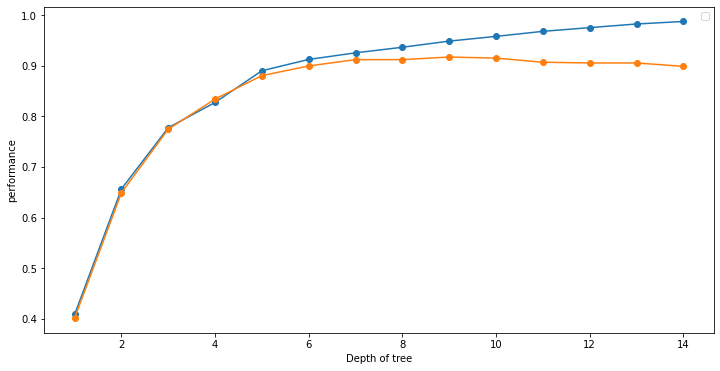

In [93]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

We can see that the maximum depth is located at 6 and after that it remains the same and later dicreases as the training accuracy increases.

## GridSearch

so we can find the optimal model

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


In [95]:
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [96]:
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=42))])

In [97]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]


dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]

rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]

-------------------------------

In [ ]:
dt_grid_search = GridSearchCV(estimator=pipe_dt,param_grid=dt_param_grid,scoring='accuracy',cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,param_grid=rf_param_grid,scoring='accuracy',cv=3)

In [ ]:
dt_grid_search.fit(X_train,y_train)
rf_grid_search.fit(X_train,y_train)

In [ ]:
grids = [dt_grid_search, rf_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train) 

In [ ]:
grid_dict = {0: 'Decision Trees', 
             1: 'Random Forest'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],model.best_params_))

-------------------------------------------------------------------------------------------------

In [98]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_leaf=6, min_samples_split=2)
clf=RandomForestClassifier(max_depth=6,min_samples_leaf=1,min_samples_split=2)

so these are the optimal models

### 30% test


### Decision Tree Classifier

In [99]:
from sklearn.model_selection import train_test_split
# train-70% of the data
# test -30% of the data
X = df.drop(columns=['Class'])
y = df['Class']
x_train, x_test, y_train,y_test=train_test_split(X,y,random_state=101,test_size=.30)

In [100]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_leaf=6, min_samples_split=2)
clf2.fit(x_train, y_train)
y_predd=clf2.predict(x_test)
print(y_predd)

[4 3 5 ... 3 1 3]


In [101]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=np.array(confusion_matrix(y_test,y_predd))
cm

array([[286,   1,  62,   0,   6,   5,  12],
       [  0, 169,   0,   0,   0,   0,   0],
       [  6,   0, 468,   0,   4,   1,   4],
       [  0,   0,   0, 995,   0,  18,  50],
       [  2,   0,  22,   5, 519,   0,  22],
       [  6,   0,   0,  16,   0, 580,  19],
       [  2,   0,   5, 104,  14,   6, 675]], dtype=int64)

in the diagonal are the true positive values

In [102]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       372
           1       0.99      1.00      1.00       169
           2       0.84      0.97      0.90       483
           3       0.89      0.94      0.91      1063
           4       0.96      0.91      0.93       570
           5       0.95      0.93      0.94       621
           6       0.86      0.84      0.85       806

    accuracy                           0.90      4084
   macro avg       0.92      0.91      0.91      4084
weighted avg       0.91      0.90      0.90      4084



the accuracy is higher here,because the model is optimized now

### RandomForestClassifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=6,min_samples_leaf=1,min_samples_split=2)
clf.fit(x_train,y_train)
y_predr=clf.predict(x_test)


In [104]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=np.array(confusion_matrix(y_test,y_predr))
cm

array([[285,   1,  68,   0,   2,   3,  13],
       [  0, 169,   0,   0,   0,   0,   0],
       [ 45,   0, 431,   0,   2,   1,   4],
       [  0,   0,   0, 996,   0,  12,  55],
       [  1,   0,  22,   4, 518,   0,  25],
       [  0,   0,   0,  14,   0, 585,  22],
       [  3,   0,   4,  88,   6,  10, 695]], dtype=int64)

In [105]:
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       372
           1       0.99      1.00      1.00       169
           2       0.82      0.89      0.86       483
           3       0.90      0.94      0.92      1063
           4       0.98      0.91      0.94       570
           5       0.96      0.94      0.95       621
           6       0.85      0.86      0.86       806

    accuracy                           0.90      4084
   macro avg       0.91      0.90      0.90      4084
weighted avg       0.90      0.90      0.90      4084



As we can see the accuracy of Random Forest and the accuracy of Decision Tree is the same at 90%.

## 60%

In [106]:
from sklearn.model_selection import train_test_split
# train-40% of the data
# test -60% of the data
X = df.drop(columns=['Class'])
y = df['Class']
x_train, x_test, y_train,y_test=train_test_split(X,y,random_state=101,test_size=.60)

In [107]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_leaf=6, min_samples_split=2)
clf2.fit(x_train, y_train)
y_predd=clf2.predict(x_test)
print(y_predd)

[4 3 5 ... 3 0 6]


In [108]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=np.array(confusion_matrix(y_test,y_predd))
cm

array([[ 619,    1,   86,    0,    9,    8,   39],
       [   0,  317,    0,    0,    0,    0,    0],
       [  45,    3,  906,    0,   16,    1,    7],
       [   0,    0,    0, 2001,    3,   42,   66],
       [   2,    0,   40,   13, 1083,    0,   27],
       [   6,    0,    0,   25,    0, 1134,   44],
       [   5,    0,   12,  241,   34,   23, 1309]], dtype=int64)

In [109]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       762
           1       0.99      1.00      0.99       317
           2       0.87      0.93      0.90       978
           3       0.88      0.95      0.91      2112
           4       0.95      0.93      0.94      1165
           5       0.94      0.94      0.94      1209
           6       0.88      0.81      0.84      1624

    accuracy                           0.90      8167
   macro avg       0.92      0.91      0.91      8167
weighted avg       0.90      0.90      0.90      8167



The accuracy did not change.

In [110]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=6,min_samples_leaf=1,min_samples_split=2)
clf.fit(x_train,y_train)
y_predr=clf.predict(x_test)


In [111]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=np.array(confusion_matrix(y_test,y_predr))
cm

array([[ 566,    1,  154,    0,    3,    3,   35],
       [   0,  317,    0,    0,    0,    0,    0],
       [  78,    2,  883,    0,    9,    1,    5],
       [   0,    0,    0, 1977,    0,   25,  110],
       [   1,    0,   47,    8, 1072,    0,   37],
       [   5,    0,    0,   26,    0, 1139,   39],
       [   4,    0,   15,  187,   10,   14, 1394]], dtype=int64)

the diagonal shows the true positive values

In [112]:
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       762
           1       0.99      1.00      1.00       317
           2       0.80      0.90      0.85       978
           3       0.90      0.94      0.92      2112
           4       0.98      0.92      0.95      1165
           5       0.96      0.94      0.95      1209
           6       0.86      0.86      0.86      1624

    accuracy                           0.90      8167
   macro avg       0.91      0.90      0.90      8167
weighted avg       0.90      0.90      0.90      8167



As we can see that the accuracy of RandomForest and DecisionTree do not change as we change the test size,because both models are the optimals.

## Conclusion

At the beginning,when the accuracy in both Random Tree and Decision Tree were low,because these models were not the optimals.The GridSearchCV showed the optimal models,which both have accuracy 90%.When the max depth of trees is over 6 we can notice the overfitting,becuase the accuracy of training increases  and the accuracy of testing dicreases.

# Neural Networs and Convolutional Neural Networks

### Normalizing Data

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# train-40% of the data
# test -60% of the data
X = df.drop(columns=['Class'])
y = df['Class']
x_train, x_test, y_train,y_test=train_test_split(X,y,random_state=101,test_size=.1)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_scaled=scaler.fit_transform(X)


Data will be significantly easier to sort through.

## Linear Classifier

In [337]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [338]:
predictions = lr.predict(x_test_scaled)
predictions

array([4, 3, 5, ..., 1, 6, 3])

In [339]:
y_test

6604     4
12309    3
1324     5
7404     4
10395    3
        ..
3256     0
11987    3
3584     1
8379     6
10409    3
Name: Class, Length: 1362, dtype: int32

In [340]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9243759177679882

Test Accuracy

In [341]:
accuracy_score(y_train,lr.predict(x_train_scaled))

0.9263613356192342

Train Accuracy

## Cross Vall

In [280]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
predicted=cross_val_predict(lr,x_scaled,y,cv=10)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [281]:
accuracy_score(y,predicted)

0.8955991477481449

Test accuracy

In [282]:
accuracy_score(y,lr.predict(x_scaled))

0.9227095731393725

Train accuracy

As we can see both cross validation training and train test split's training accuracy based on Linear Classifier(Logistic Regression) are the same but the accuracy of test is higher in in train test split than crossvalidation's.So we can understand that this dataset is linear separable.

## MLPClassifier

In [237]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [238]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],


SyntaxError: unexpected EOF while parsing (<ipython-input-238-73326150d3cf>, line 6)

## Gridsearch to find optimal MLP

In [239]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train_scaled,y_train)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [240]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)



Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


the best model

In [241]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.925 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.931 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.926 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.932 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.926 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.933 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.925 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 

This is the optimal model.

In [242]:
mlp=MLPClassifier(max_iter=100,activation='relu',alpha=0.05,hidden_layer_sizes=(50,50,50),learning_rate='constant',solver='adam')
mlp.fit(x_train_scaled,y_train)


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50, 50), max_iter=100)

In [243]:
y_pred=mlp.predict(x_test_scaled)
from sklearn.metrics import confusion_matrix ,classification_report
cm=np.array(confusion_matrix(y_test,y_pred))
cm

array([[301,   0,   8,   0,   0,   2,   3],
       [  0, 144,   0,   0,   0,   0,   0],
       [ 20,   0, 361,   0,   2,   1,   5],
       [  0,   0,   0, 816,   0,  10,  70],
       [  2,   0,  14,   4, 451,   0,  18],
       [  3,   0,   0,  10,   0, 486,  15],
       [  4,   0,   0,  28,  11,   7, 607]], dtype=int64)

the values of diagonal shows the true pedict

In [244]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       314
           1       1.00      1.00      1.00       144
           2       0.94      0.93      0.94       389
           3       0.95      0.91      0.93       896
           4       0.97      0.92      0.95       489
           5       0.96      0.95      0.95       514
           6       0.85      0.92      0.88       657

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



the accuracy on mlp is higher than logistic regression,because the mlp is the optimal model.

### CNN

In [342]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

### First model

In [343]:
model = Sequential()
model.add(Dense(17,input_dim=16,activation='relu'))
model.add(Dropout(.05))
#model.add(Dense(256,activation='tanh'))
model.add(Dense(256,activation='tanh'))
model.add(Dropout(.05))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.03),'sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 17)                289       
_________________________________________________________________
dropout_9 (Dropout)          (None, 17)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 256)               4608      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_120 (Dense)            (None, 7)                 1799      
Total params: 6,696
Trainable params: 6,696
Non-trainable params: 0
_________________________________________________________________


In [344]:
batch_size=32
epochs=40
history=model.fit(x_train_scaled,y_train,validation_split=.01,batch_size=batch_size,epochs=epochs)

Epoch 1/40
379/379 [==============================] - 0s 926us/step - loss: 0.4754 - accuracy: 0.8562 - val_loss: 0.1320 - val_accuracy: 0.9431
Epoch 2/40
379/379 [==============================] - 0s 871us/step - loss: 0.3866 - accuracy: 0.8850 - val_loss: 0.3025 - val_accuracy: 0.9187
Epoch 3/40
379/379 [==============================] - 0s 724us/step - loss: 0.5532 - accuracy: 0.8688 - val_loss: 0.4746 - val_accuracy: 0.9187
Epoch 4/40
379/379 [==============================] - 0s 695us/step - loss: 0.4977 - accuracy: 0.8836 - val_loss: 0.2242 - val_accuracy: 0.9350
Epoch 5/40
379/379 [==============================] - 0s 689us/step - loss: 0.4565 - accuracy: 0.8851 - val_loss: 0.2903 - val_accuracy: 0.9431
Epoch 6/40
379/379 [==============================] - 0s 716us/step - loss: 0.5397 - accuracy: 0.8819 - val_loss: 0.3342 - val_accuracy: 0.9268
Epoch 7/40
379/379 [==============================] - 0s 703us/step - loss: 0.5434 - accuracy: 0.8787 - val_loss: 0.2932 - val_accuracy:

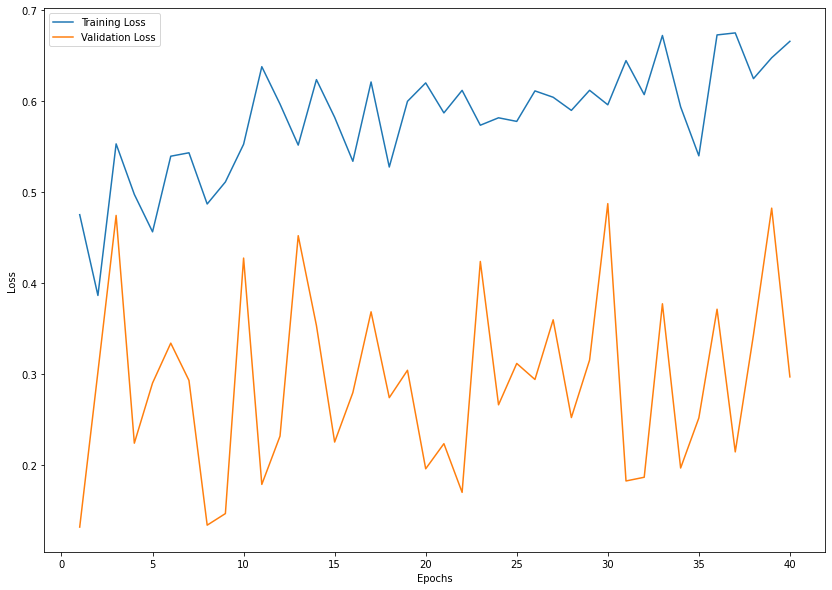

In [345]:
plt.figure(figsize=(14,10))

epoch_range=range(1,epochs+1)
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epoch_range,train_loss,label='Training Loss')
plt.plot(epoch_range,val_loss,label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Can be noticed that training and validation loss do not fit.

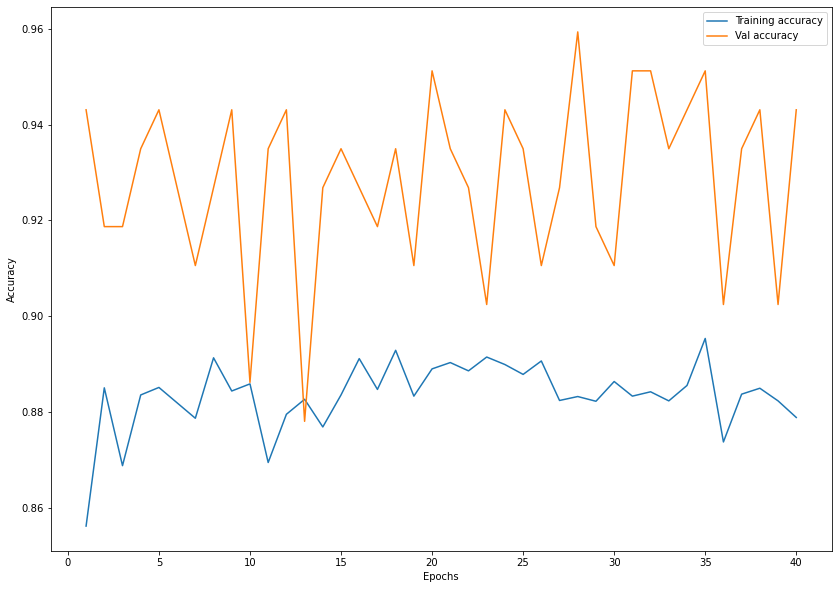

In [346]:
plt.figure(figsize=(14,10))

epoch_range=range(1,epochs+1)
train_loss=history.history['accuracy']
val_loss=history.history['val_accuracy']
plt.plot(epoch_range,train_loss,label='Training accuracy')
plt.plot(epoch_range,val_loss,label='Val accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


The accuracy of training and the accuracy of validation again do not fit.

In [347]:
model.evaluate(x_test_scaled,y_test)

43/43 [==============================] - 0s 394us/step - loss: 0.4632 - accuracy: 0.9046


[0.46324506402015686, 0.9045521020889282]

The accuracy is high,but the loss is also high.

## Second model

In [375]:
from keras.optimizers import SGD

In [376]:
model = Sequential()
model.add(Dense(17,input_dim=16,activation='relu'))
model.add(Dropout(.05))
#model.add(Dense(256,activation='tanh'))
model.add(Dense(256,activation='tanh'))
model.add(Dropout(.05))
model.add(Dense(7,activation='softmax'))
sgd=SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)

In [377]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [378]:
history=model.fit(x_train_scaled,y_train,validation_split=.01,epochs=40,batch_size=128)

Epoch 1/40
95/95 [==============================] - 0s 2ms/step - loss: 0.8238 - accuracy: 0.7159 - val_loss: 0.2649 - val_accuracy: 0.9268
Epoch 2/40
95/95 [==============================] - 0s 861us/step - loss: 0.3224 - accuracy: 0.8927 - val_loss: 0.1839 - val_accuracy: 0.9350
Epoch 3/40
95/95 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.9031 - val_loss: 0.1606 - val_accuracy: 0.9431
Epoch 4/40
95/95 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.9066 - val_loss: 0.1446 - val_accuracy: 0.9512
Epoch 5/40
95/95 [==============================] - 0s 1ms/step - loss: 0.2457 - accuracy: 0.9113 - val_loss: 0.1461 - val_accuracy: 0.9675
Epoch 6/40
95/95 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.9144 - val_loss: 0.1304 - val_accuracy: 0.9593
Epoch 7/40
95/95 [==============================] - 0s 987us/step - loss: 0.2369 - accuracy: 0.9147 - val_loss: 0.1358 - val_accuracy: 0.9512
Epoch 8/40
95/95

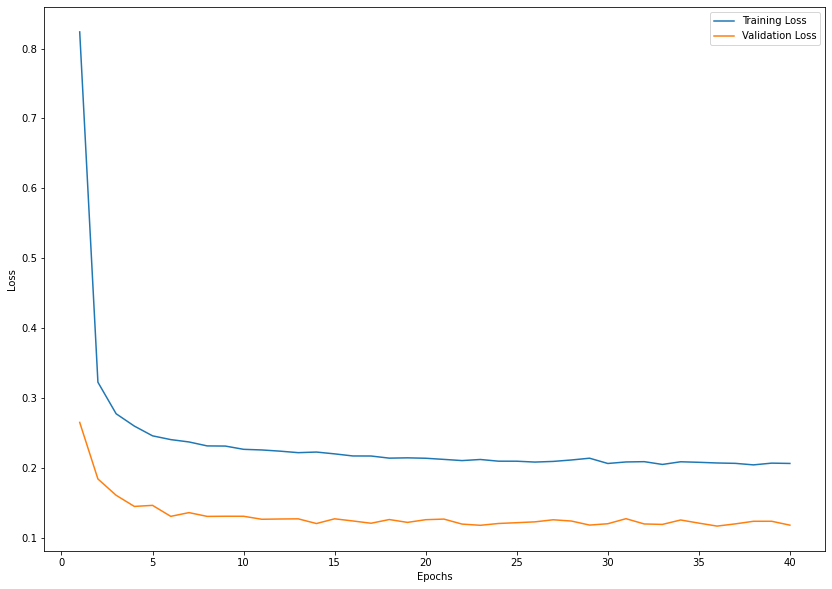

In [379]:
plt.figure(figsize=(14,10))

epoch_range=range(1,epochs+1)
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epoch_range,train_loss,label='Training Loss')
plt.plot(epoch_range,val_loss,label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In this diagram the training and validation loss are more close to each other than the previous model.

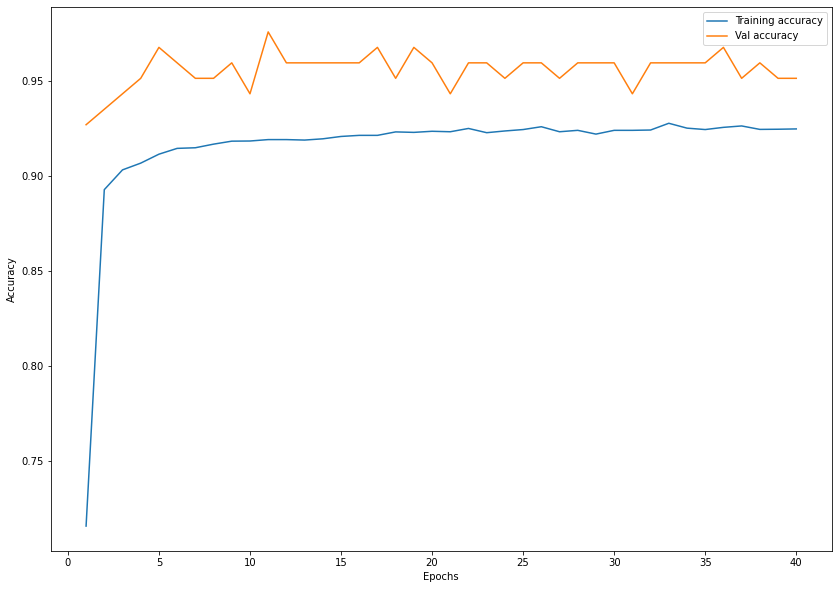

In [380]:
plt.figure(figsize=(14,10))

epoch_range=range(1,epochs+1)
train_loss=history.history['accuracy']
val_loss=history.history['val_accuracy']
plt.plot(epoch_range,train_loss,label='Training accuracy')
plt.plot(epoch_range,val_loss,label='Val accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


Also the training and validation accuracy is close to this diagram

In [381]:
model.evaluate(x_test_scaled,y_test)

43/43 [==============================] - 0s 371us/step - loss: 0.2148 - accuracy: 0.9236


[0.21476323902606964, 0.9236416816711426]

This model fits better than the previous,because the loss is lower and the accuracy is higher.

## Third model

In [393]:
model = Sequential()
model.add(Dense(17,input_dim=16,activation='relu'))
model.add(Dropout(.05))
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(.05))
model.add(Dense(256,activation='tanh'))
model.add(Dropout(.05))
model.add(Dense(7,activation='softmax'))
sgd=SGD(lr=0.03,decay=1e-6,momentum=0.9,nesterov=True)

model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 17)                289       
_________________________________________________________________
dropout_31 (Dropout)         (None, 17)                0         
_________________________________________________________________
dense_150 (Dense)            (None, 256)               4608      
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 7)               

In [394]:
batch_size=64
epochs=40
history=model.fit(x_train_scaled,y_train,validation_split=.02,batch_size=batch_size,epochs=epochs)

Epoch 1/40
188/188 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.7981 - val_loss: 0.1475 - val_accuracy: 0.9510
Epoch 2/40
188/188 [==============================] - 0s 1ms/step - loss: 0.2730 - accuracy: 0.9021 - val_loss: 0.1387 - val_accuracy: 0.9592
Epoch 3/40
188/188 [==============================] - 1s 3ms/step - loss: 0.2548 - accuracy: 0.9077 - val_loss: 0.1404 - val_accuracy: 0.9469
Epoch 4/40
188/188 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9074 - val_loss: 0.1199 - val_accuracy: 0.9633
Epoch 5/40
188/188 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.9129 - val_loss: 0.1173 - val_accuracy: 0.9551
Epoch 6/40
188/188 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9172 - val_loss: 0.1092 - val_accuracy: 0.9592
Epoch 7/40
188/188 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9166 - val_loss: 0.1100 - val_accuracy: 0.9714
Epoch 

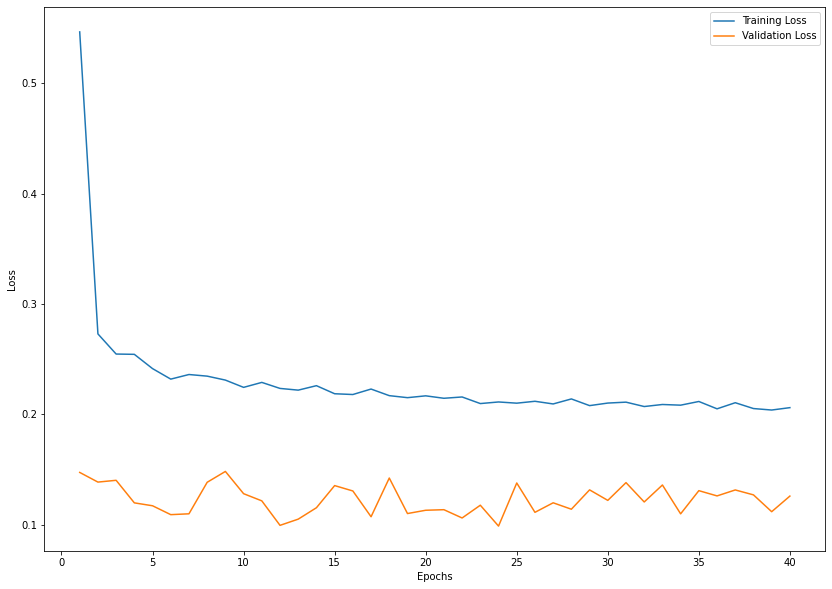

In [395]:
plt.figure(figsize=(14,10))

epoch_range=range(1,epochs+1)
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epoch_range,train_loss,label='Training Loss')
plt.plot(epoch_range,val_loss,label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

This model looks like first model.

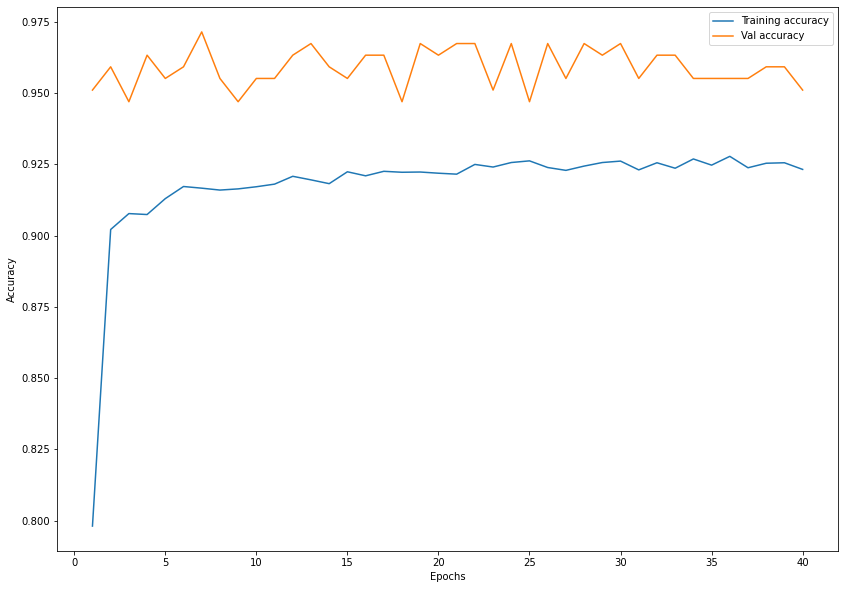

In [396]:
plt.figure(figsize=(14,10))

epoch_range=range(1,epochs+1)
train_loss=history.history['accuracy']
val_loss=history.history['val_accuracy']
plt.plot(epoch_range,train_loss,label='Training accuracy')
plt.plot(epoch_range,val_loss,label='Val accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


In [397]:
model.evaluate(x_test_scaled,y_test)

43/43 [==============================] - 0s 441us/step - loss: 0.2059 - accuracy: 0.9236


[0.20592617988586426, 0.9236416816711426]

We notice that the loss is quite lower than in our second model.

## Conclusion

The accuracy on MlP was the best,because through GridSerach found the optimal model.The dataset is linear seperable,because the training and the testing accuracy fits in Linear Classifier.In Neural Network even if the accuracy was high.From the plots we could see that the training and validation accuracy do not fit each other.So the neural network cannnot generalize to the dataset.

## END

In [ ]:
model = Sequential()
model.add(Dense(17,input_dim=16,activation='relu'))
model.add(Dropout(.05))
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(.05))
model.add(Dense(256,activation='tanh'))
model.add(Dropout(.05))
model.add(Dense(7,activation='softmax'))
sgd=SGD(lr=0.03,decay=1e-6,momentum=0.9,nesterov=True)

model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.summary()

In [9]:
model = Sequential()
model.add(Conv1D(64),(3,3),input_shape=16)
model.add(Dense(256,activation='sigmoid'))
model.add(MaxPooling1D(pool_size=32)
model.add(Dense(7,activation='softmax'))
sgd=SGD(lr=0.03,decay=1e-6,momentum=0.9,nesterov=True)

model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.summary()


SyntaxError: invalid syntax (<ipython-input-9-30ac5d98e6d8>, line 5)